In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# from google.colab import files
# uploaded = files.upload()


In [3]:
df = pd.read_csv('sbux.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [4]:
df.tail() # 2013년 2월 ~ 2018년 2월 데이터

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [5]:
# Start by doing the WRONG thing - trying to predict the price itself

# 데이터를 하나하나씩 끊어서 독립적인 데이터로 저장
# 데이터의 갯수만큼 행 , 열은 하나
series = df['close'].values.reshape(-1,1)
series

array([[28.185],
       [28.07 ],
       [28.13 ],
       ...,
       [54.69 ],
       [55.61 ],
       [54.46 ]])

In [7]:
# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.

# 스케일링 진행
scaler = StandardScaler()
scaler.fit(series[:len(series)])

# 스케일 작업한 데이터를 FLATTEN 하여 저장
series = scaler.transform(series).flatten()
series

array([-1.94144714, -1.95251788, -1.94674184, ...,  0.61011874,
        0.6986847 ,  0.58797726])

In [8]:
### build the dataset
# let's see if we can use T past values to predict the next value

T = 10
D = 1
X = []
Y = []

# 왜 이렇게 append 하여 리스트로 ?
# 일반 데이터를 시퀀스 데이터로 만든다. 10개의 데이터를 하나의 세트로 만들어서 
# 0번~9번 데이터, 1번~10번 데이터, 2번~11번 데이터 이렇게 저장하여 시퀀스 데이터를 만든다!

for t in range(len(series) - T):
    x = series[t: t+T] # 1번째 ~ 10번째 가격 = x 값
    X.append(x)
    y = series[t+T] # 11번째 데이터 = y 값
    Y.append(y)
    

In [35]:
X = []
x = series[0:10]
X.append(x)
x = series[1:11]
X.append(x)
print(X)

[array([-0.37879654,  0.12441548, -0.66715001, -0.45447142, -1.811458  ,
        0.11525218, -1.74302665,  0.01214752,  1.19536578, -1.4828577 ]), array([ 0.12441548, -0.66715001, -0.45447142, -1.811458  ,  0.11525218,
       -1.74302665,  0.01214752,  1.19536578, -1.4828577 ,  0.05789153])]


In [37]:
Y = []
y = series[10]
Y.append(y)
y = series[11]
Y.append(y)
print(Y)

[0.057891534966032755, 1.9109291069922465]


In [38]:
series[:15]

array([-0.37879654,  0.12441548, -0.66715001, -0.45447142, -1.811458  ,
        0.11525218, -1.74302665,  0.01214752,  1.19536578, -1.4828577 ,
        0.05789153,  1.91092911,  0.36668694, -0.01906782,  1.17565605])

In [9]:
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print(f"X.shape : {X.shape}, Y.shape : {Y.shape}, N.length : {N}")

X.shape : (1249, 10, 1), Y.shape : (1249,), N.length : 1249


In [10]:
### try autoregressive RNN model

i = Input(shape = (T,1))  # 인풋 데이터의 shape 는 행 10개, 열 1개
x = LSTM(5)(i) # hidden layer 의 neurons = 5
x = Dense(1)(x) # 예측 할 결과는 예측 지수 값 = 1가지
# Dense(1)( LSTM(5)( input( shape = (10, 1) ) ) )

model = Model(i,x)
model.compile(loss = 'mse', optimizer = Adam(lr=0.1), metrics=['accuracy'])

# train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs=100, validation_data =(X[-N//2:], Y[-N//2:]))

Epoch 1/100


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 26ms/step - loss: 0.2536 - accuracy: 0.0000e+00 - val_loss: 0.3528 - val_accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 0.0000e+00 - val_loss: 0.0573 - val_accuracy: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - val_loss: 0.0397 - val_accuracy: 0.0000e+00
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0338 - val_accuracy: 0.0000e+00
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0281 - val_accuracy: 0.0000e+00
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0256 - val_accuracy: 0.0000e+00
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.

Epoch 56/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 57/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 58/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0158 - val_accuracy: 0.0000e+00
Epoch 60/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0089 - val_accuracy: 0.0000e+00
Epoch 61/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0109 - val_accuracy: 0.0000e+00
Epoch 62/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 0.0000e

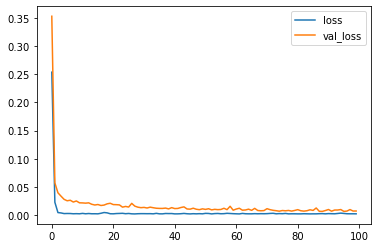

In [11]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

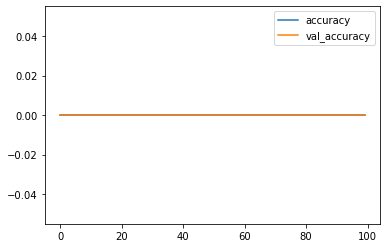

In [12]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [14]:
# One-step forecast using true targets
# 우리가 예측 하려는 값들에 대해 - 그래프 그리기
predicts= model.predict(X)
print(predicts.shape)

final_predictions = predicts[:,0]

(1249, 1)


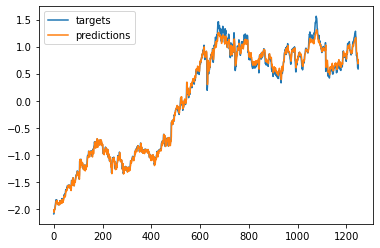

In [15]:
plt.plot(Y, label='targets')
plt.plot(final_predictions, label = 'predictions')
plt.legend()
plt.show()

In [19]:
# Multi-step forecast
# 후반부 데이터

validation_targets = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]

# while 예측한 데이터의 갯수가 y의 갯수를 넘지 않을때까지만 :  
# 0부터 

while len(validation_predictions) < len(validation_target): 
    # 
    # 모델이 예측한 값을 가져온다!
    p = model.predict(last_x.reshape(1,T,1))[0,0]
    # 리스트에 추가
    validation_predictions.append(p)
    
    # 새로운 last_x 는 
    # 기존 값을 roll 시켜서 (맨 처음값 1개를 맨 뒤로 보내고... )
    last_x = np.roll(last_x, -1)
    # last_x 맨 뒤의 값을 p 인 예측 값으로 바꾼다. 
    last_x[-1] = p

In [39]:
last_x

array([[-0.13322583],
       [-0.13322568],
       [-0.1332258 ],
       [-0.13322583],
       [-0.13322589],
       [-0.13322577],
       [-0.13322583],
       [-0.1332258 ],
       [-0.1332258 ],
       [-0.13322589]])

In [46]:
model.predict(last_x.reshape(1,T,1)) 

array([[-0.13322571]], dtype=float32)

In [47]:
model.predict(last_x.reshape(1,T,1))[0] # 배열이 하나 없어진다!

array([-0.13322571], dtype=float32)

In [44]:
p = model.predict(last_x.reshape(1,T,1))[0,0] # 배열이 하나 또 없어지고, 값만 가져온다!
p

-0.1332258

In [45]:
last_x = np.roll(last_x, -1)
print(last_x)

last_x[-1] = p
print(last_x)

[[-0.13322568]
 [-0.1332258 ]
 [-0.13322583]
 [-0.13322589]
 [-0.13322577]
 [-0.13322583]
 [-0.1332258 ]
 [-0.1332258 ]
 [-0.13322589]
 [-0.13322583]]
[[-0.13322568]
 [-0.1332258 ]
 [-0.13322583]
 [-0.13322589]
 [-0.13322577]
 [-0.13322583]
 [-0.1332258 ]
 [-0.1332258 ]
 [-0.13322589]
 [-0.1332258 ]]


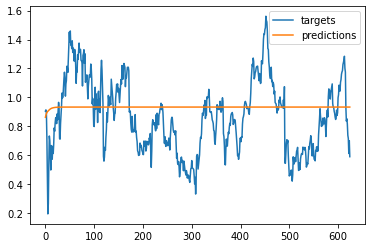

In [20]:
# 왜 일자 그래프가 그려지지?

plt.plot(validation_targets, label = 'targets')
plt.plot(validation_predictions, label = 'predictions')
plt.legend()

In [22]:
# calculate returns by first shifting the data

df['PrevClose'] = df['close'].shift(1) # close 컬럼 값을 위아래 한칸씩 이동한 값을 불러오기 : 1 한칸 아래 값, -1 한칸 위의 값

# so now it's like
# close / prev close
# x[2] x[1]
# x[3] x[2]
# x[4] x[3]
# ...
# x[t] x[t-1]

In [24]:
# then the return is
# (x[t] - x[t-1]) / x[t-1]

df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']
# 수익률 = (파이널 값 - 이전 값) / 이전값

In [25]:
df.head() # PrevClose 값과 Return 수익률 값이 들어갔다.

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


<AxesSubplot:>

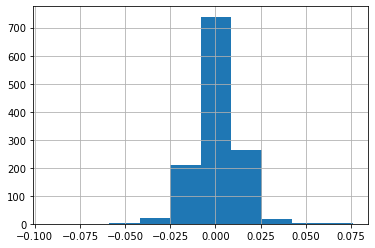

In [26]:
df['Return'].hist() # 히스토그램 그려보기

In [27]:
# Now let's try an LSTM to predict returns
# 수익률 데이터만 따로 준비

# 수익률 데이터 0번 행은 값이 Nan 이다. 

# 행 = 데이터의 갯수, 열 = 1 인 'series' 를 만든다. 

series = df['Return'].values[1:].reshape(-1,1) 
scaler = StandardScaler()
scaler.fit(series[:len(series)]) # StandardScaler().fit(series[ : len(series) ])
series = scaler.transform(series).flatten()
series

array([-0.37879654,  0.12441548, -0.66715001, ..., -1.61585067,
        1.31287055, -1.72223474])

In [28]:
### build the dataset
# let's see if we can use T past values to predict the next value

T = 10
D = 1
X = []
Y = []

# 왜 이렇게 append 하여 리스트로 만드는거지?
for t in range(len(series) - T):
    x = series[t: t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print(f"X.shape : {X.shape}, Y.shape : {Y.shape}, N.length : {N}")

X.shape : (1248, 10, 1), Y.shape : (1248,), N.length : 1248


In [29]:
### try autoregressive RNN model

# train the RNN

### try autoregressive RNN model
i = Input(shape = (T,1))  # 왜 T,1 인지는 공부를 해야 알거같에
x = LSTM(5)(i) # 5는 왜 5이지? i는 공부하면 알듯
x = Dense(1)(x) # 왜 1이지? x 를 넣네..
model = Model(i,x)
model.compile(loss = 'mse', optimizer = Adam(lr=0.1), metrics=['accuracy'])

# train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], epochs=100, validation_data =(X[-N//2:], Y[-N//2:]))

Epoch 1/100


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 22ms/step - loss: 0.9598 - accuracy: 0.0000e+00 - val_loss: 1.0978 - val_accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9294 - accuracy: 0.0000e+00 - val_loss: 1.0739 - val_accuracy: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9247 - accuracy: 0.0000e+00 - val_loss: 1.0980 - val_accuracy: 0.0000e+00
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9217 - accuracy: 0.0000e+00 - val_loss: 1.1573 - val_accuracy: 0.0000e+00
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9217 - accuracy: 0.0000e+00 - val_loss: 1.0791 - val_accuracy: 0.0000e+00
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9266 - accuracy: 0.0000e+00 - val_loss: 1.1149 - val_accuracy: 0.0000e+00
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9191 - accuracy: 0.0000e+00 - val_loss: 1.

Epoch 56/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9080 - accuracy: 0.0000e+00 - val_loss: 1.0836 - val_accuracy: 0.0000e+00
Epoch 57/100
20/20 [==============================] - 0s 5ms/step - loss: 0.9021 - accuracy: 0.0000e+00 - val_loss: 1.1078 - val_accuracy: 0.0000e+00
Epoch 58/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8963 - accuracy: 0.0000e+00 - val_loss: 1.1343 - val_accuracy: 0.0000e+00
Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.8822 - accuracy: 0.0000e+00 - val_loss: 1.1702 - val_accuracy: 0.0000e+00
Epoch 60/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8730 - accuracy: 0.0000e+00 - val_loss: 1.2328 - val_accuracy: 0.0000e+00
Epoch 61/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8526 - accuracy: 0.0000e+00 - val_loss: 1.2169 - val_accuracy: 0.0000e+00
Epoch 62/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8618 - accuracy: 0.0000e

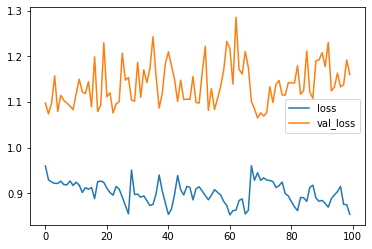

In [30]:
# plot accuracy per iteration

# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

(1248, 1)


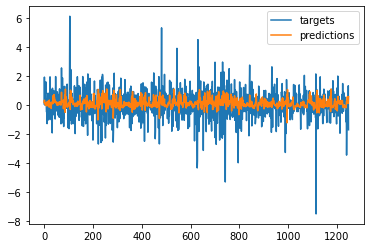

In [31]:
# One-step forecast using true targets

# 우리가 예측 하려는 값들에 대해 - 그래프 그리기
predicts= model.predict(X)
print(predicts.shape)

final_predictions = predicts[:,0]

plt.plot(Y, label='targets')
plt.plot(final_predictions, label = 'predictions')
plt.legend()
plt.show()

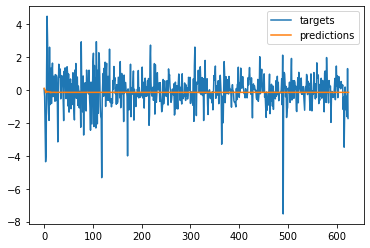

In [32]:
# Multi-step forecast

# Multi-step forecast
# 후반부 데이터

validation_targets = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]

# 왜 길이 비교를 하지?

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,T,1))[0,0]
    validation_predictions.append(p)
    
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
    
# 왜 일자 그래프가 그려지지?

plt.plot(validation_targets, label = 'targets')
plt.plot(validation_predictions, label = 'predictions')
plt.legend()

In [ ]:
# Now turn the full data into numpy arrays

# Not yet in the final "X" format


In [ ]:
# Now make the actual data which will go into the nerual network


In [ ]:
# normalize the inputs


In [ ]:
# Setup X_train and Y_train


In [ ]:
# Setup X_test and Y_test


In [ ]:
# make the RNN


In [ ]:
# train the RNN


In [ ]:
# plot the loss


In [ ]:
# plot the loss
